In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np 
import pandas as pd

In [56]:

df=pd.read_csv('model_input_MultiClass_ver1.csv')
print(df.head())
#Splitting the class table into data X and class label y
X=df[['dpl','nperi','ci']]
y=df['category']


   dpl  nperi    ci  nce  category
0   27      3  10.0   12         1
1   27      3  15.0    6         1
2   27      3  20.0   10         3
3   27      3  25.0    8         2
4   27      3  30.0   13         4


   dpl  nperi    ci  nce  category
0   27      3  10.0   12         1
1   27      3  15.0    6         1
2   27      3  20.0   10         3
3   27      3  25.0    8         2
4   27      3  30.0   13         4


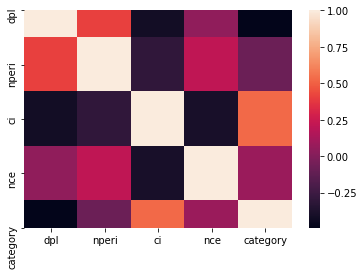

In [57]:
data = pd.read_csv('model_input_MultiClass_ver1.csv')
print(data.head(5))
import seaborn as sns
%matplotlib inline
sns.heatmap(data.corr())

### Gini index or Gini impurity measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen.

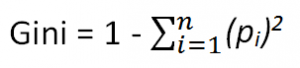

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(random_state=1234)
pred = clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
print(classification_report(y_test,predictions))
print(clf)


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2470
           2       1.00      1.00      1.00       520
           3       0.98      1.00      0.99       123
           4       1.00      1.00      1.00       174

    accuracy                           1.00      3287
   macro avg       1.00      1.00      1.00      3287
weighted avg       1.00      1.00      1.00      3287

DecisionTreeClassifier(random_state=1234)


In [129]:
clf.predict([[251,5,15]])

array([1], dtype=int64)

In [76]:
import pickle
pickle_out = open("DT_Class.pkl",mode="wb")
pickle.dump(clf,pickle_out)
pickle_out.close()

In [114]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(max_depth=10, random_state=0)
rand_clf.fit(X, y)
rand_pred = rand_clf.predict(X_test)
print(classification_report(y_test,rand_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2470
           2       0.98      0.99      0.98       520
           3       0.93      0.92      0.93       123
           4       1.00      0.98      0.99       174

    accuracy                           0.99      3287
   macro avg       0.98      0.97      0.97      3287
weighted avg       0.99      0.99      0.99      3287



In [118]:
print(rand_clf.predict([[251,4,30]]))

[3]


In [103]:
import pickle
pickle_out = open("rand_Class.pkl",mode="wb")
pickle.dump(clf,pickle_out)
pickle_out.close()

In [79]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
#y = np.array([1, 1, 1, 2, 2, 2])
clf_LDA = LinearDiscriminantAnalysis()
clf_LDA.fit(X_train,y_train)
#LinearDiscriminantAnalysis()
#print(clf.predict([[-0.8, -1]]))
print(clf_LDA.predict([[251,5,50]]))
lda_pred = clf_LDA.predict(X_test)
print(classification_report(y_test,lda_pred))

[1]
              precision    recall  f1-score   support

           1       0.80      0.98      0.88      2470
           2       0.00      0.00      0.00       520
           3       0.26      0.22      0.24       123
           4       0.74      0.63      0.68       174

    accuracy                           0.78      3287
   macro avg       0.45      0.46      0.45      3287
weighted avg       0.65      0.78      0.71      3287



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
#Below model created after doing PCA (2 components) on the input feature data which reduced the noise and least important dimensions to improve quality of the model created
from sklearn import svm
from sklearn import metrics

model1 = svm.SVC()  
model1.fit(X_train , y_train)
y_pred = model1.predict(X_test)
print("Accuracy on training set: {:.2f}".format(model1.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model1.score(X_test, y_test)))

Accuracy on training set: 0.78
Accuracy on test set: 0.79


In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      1.00      0.89      2470
           2       1.00      0.00      0.00       520
           3       0.11      0.01      0.02       123
           4       0.61      0.68      0.64       174

    accuracy                           0.79      3287
   macro avg       0.63      0.42      0.39      3287
weighted avg       0.80      0.79      0.70      3287

